In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import sklearn 
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

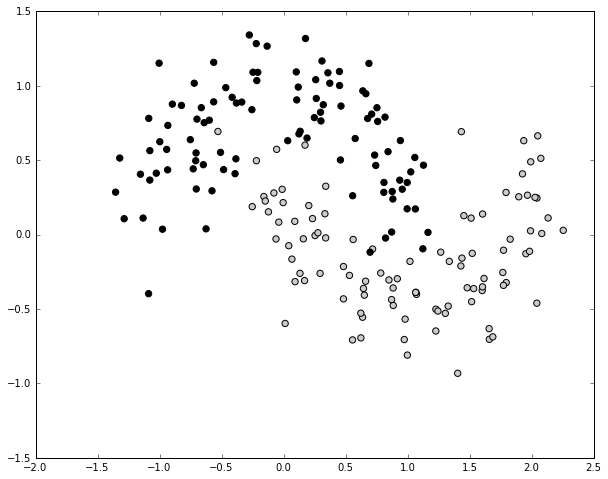

In [33]:
np.random.seed(0)
X,Y = sklearn.datasets.make_moons(200, noise = 0.20)
plt.scatter(X[:,0], X[:,1], s = 40, c = Y, cmap=plt.cm.spectral)

In [34]:
print Y.shape

(200,)


In [35]:
#testing with logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,Y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

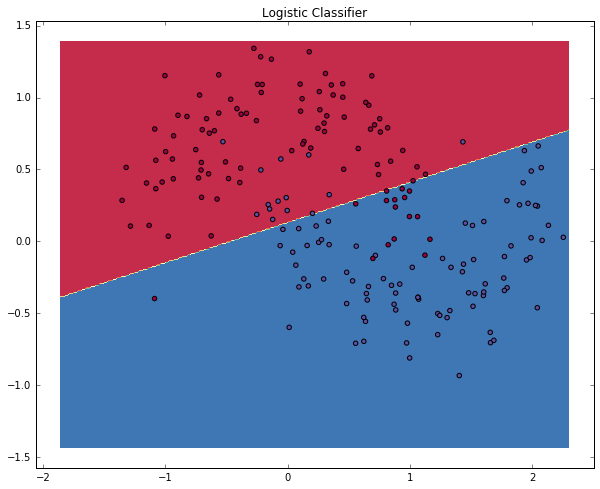

In [36]:
#plotting the decision boundary
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .05
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .05
    h = .01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy, z, cmap=plt.cm.Spectral)
    plt.scatter(X[:,0], X[:,1], c = Y, cmap=plt.cm.Spectral)
    
    
plot_decision_boundary(lambda X: clf.predict(X))
plt.title("Logistic Classifier")

In [37]:
#defining parameters

num_examples = len(X)
nn_input_dim = 2 
nn_output_dim = 2

epsilon = 0.01
reg_lambda = 0.01

In [38]:
#The loss function

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    #forward propagation
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), Y])
    data_loss = np.sum(corect_logprobs)
  
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss
    

In [39]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [40]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    print W1
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), Y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print "Loss after iteration %i: %f" %(i, calculate_loss(model))
    
    return model

[[ 1.24737338  0.28295388  0.69207227]
 [ 1.58455078  1.32056292 -0.69103982]]
Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068939
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


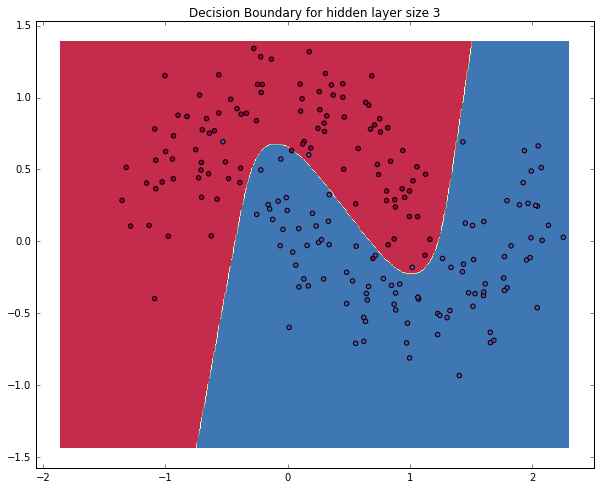

In [41]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

[[ 1.24737338]
 [ 0.28295388]]
[[ 1.24737338  0.28295388]
 [ 0.69207227  1.58455078]]
[[ 1.24737338  0.28295388  0.69207227]
 [ 1.58455078  1.32056292 -0.69103982]]
[[ 1.24737338  0.28295388  0.69207227  1.58455078]
 [ 1.32056292 -0.69103982  0.67181396 -0.10702571]]
[[ 1.24737338  0.28295388  0.69207227  1.58455078  1.32056292]
 [-0.69103982  0.67181396 -0.10702571 -0.07298675  0.29033699]]
[[ 1.24737338  0.28295388  0.69207227  1.58455078  1.32056292 -0.69103982
   0.67181396 -0.10702571 -0.07298675  0.29033699  0.10185419  1.02832666
   0.53813494  0.08603723  0.3138587   0.23594338  1.05647344 -0.1450688
   0.22137229 -0.60393689]
 [-1.80523641  0.46217814  0.6112487  -0.52478992  1.60495889 -1.02839183
   0.03235616 -0.13235897  1.08383858  1.03899355  0.10956438  0.26740128
  -0.62775932 -1.40063461 -0.24601104  0.11055542  0.86994688  0.85021094
  -0.27388142 -0.21376032]]
[[ 1.24737338  0.28295388  0.69207227  1.58455078  1.32056292 -0.69103982
   0.67181396 -0.10702571 -0.0729

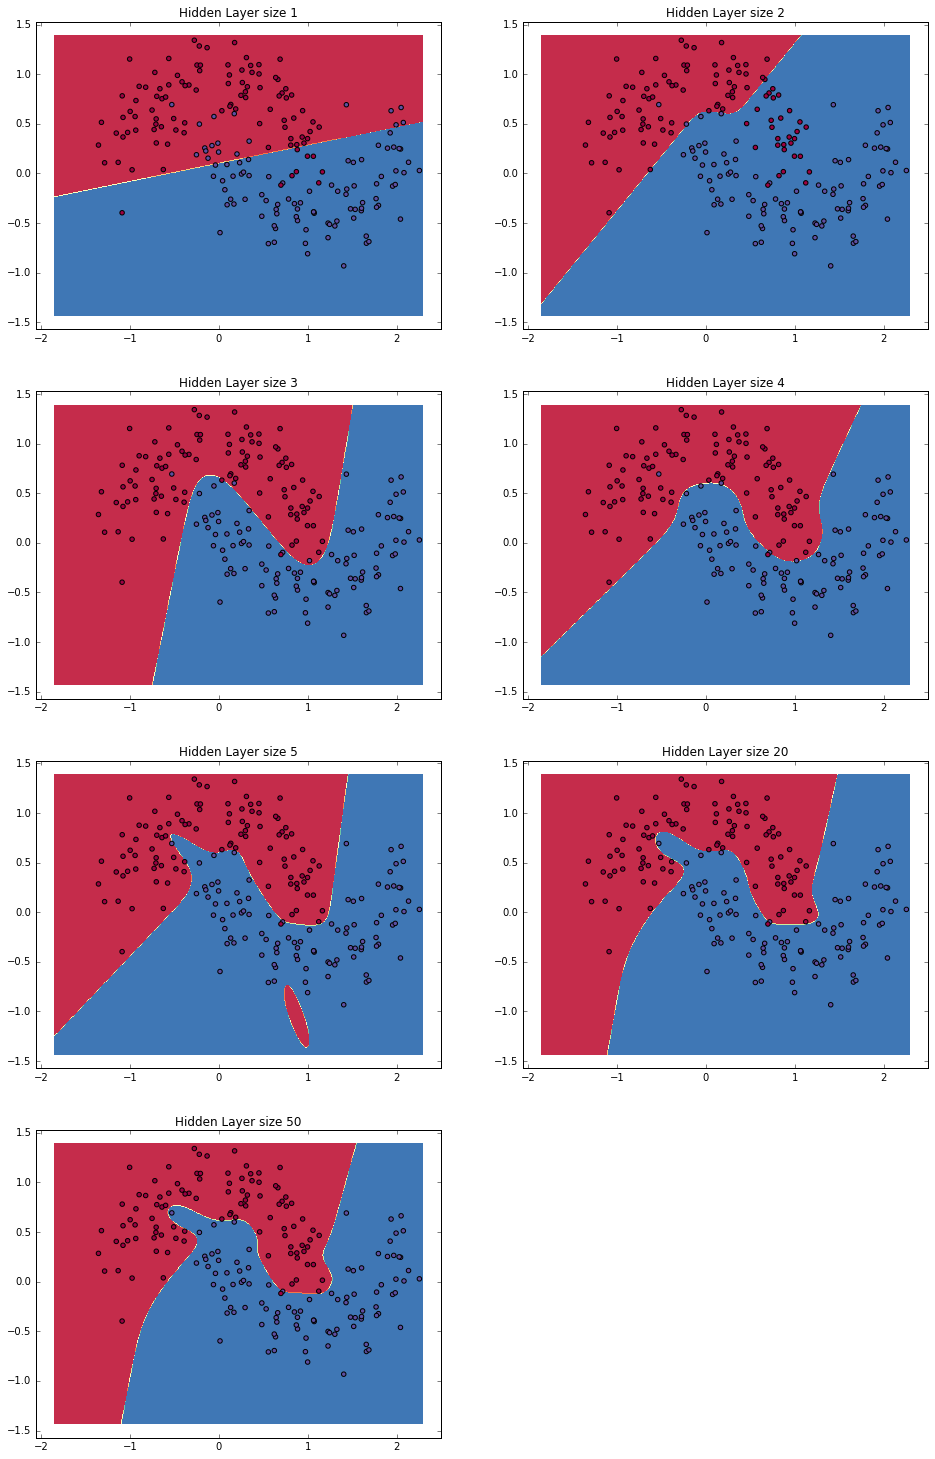

In [42]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()